---
# Stimulus order/interstimulus interval

In [1]:
from linescanning import simulate, plotting
import yaml
import numpy as np
import os
opj = os.path.join


## task-SRFa

In [2]:
#---------------------------------------------------------------------------------------------------
# EXPERIMENT SETTINGS
settings_path = "/data1/projects/MicroFunc/Jurjen/programs/project_repos/LineExps/ActNorm3/settings.yml"
with open(settings_path, 'r', encoding='utf8') as f_in:
    settings = yaml.safe_load(f_in)

events = ["act","suppr_1","suppr_2"]
n_events = len(events)
stim_repetitions = settings['stimuli'].get('n_repetitions')
n_trials = int(n_events*stim_repetitions)


ITIs created with total ITI duration of 268.48s after 2 iterations
Total experiment time: 328.48s (= 3128 samples)


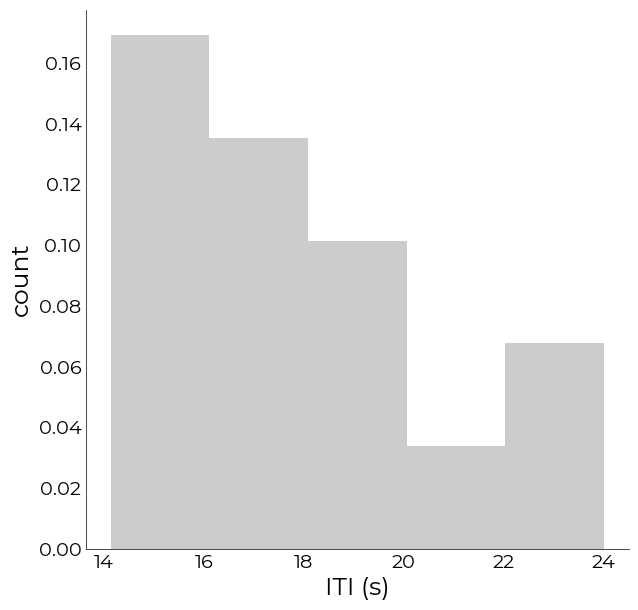

In [124]:

itisA = simulate.ITI(
    tmin=settings['design'].get('minimal_iti_duration'),
    tmax=settings['design'].get('maximal_iti_duration'),
    tmean=settings['design'].get('mean_iti_duration'),    
    n_trials=n_trials,
    leeway=settings['design'].get('total_iti_duration_leeway'),
    stim_duration=settings['design'].get('stim_duration'),
    total_duration=settings['design'].get('intended_duration'),
    start_duration=settings['design'].get('start_duration'),
    end_duration=settings['design'].get('end_duration'),
    events=events,
    verbose=True
)

%matplotlib inline
itisA.plot_iti_distribution()
# np.savetxt(f"/data1/projects/MicroFunc/Jurjen/programs/project_repos/Experiments/BlockFingertap/itis_desc-{n_trials}_events.txt", itis.itis)


In [9]:
iti_file = opj(os.path.dirname(settings_path), f"itis_task-SRFa.txt")
order_file = opj(os.path.dirname(settings_path), f"order_task-SRFb.txt")


In [12]:
np.savetxt(iti_file, itisA.itis)
order = itisA.onset_df.reset_index()["event_type"].factorize()[0].astype(int)
np.savetxt(order_file, order)


---
## task-SRFb

ITIs created with total ITI duration of 271.72s after 16 iterations
Total experiment time: 331.72s (= 3159 samples)


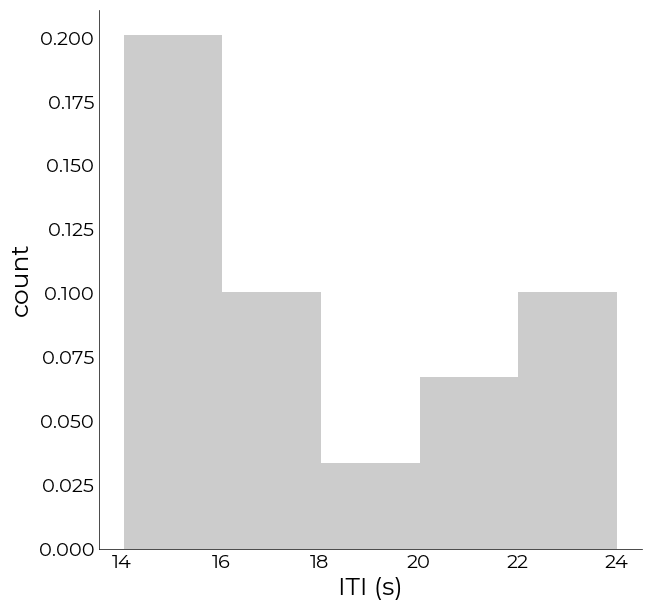

In [132]:
itisB = simulate.ITI(
    tmin=settings['design'].get('minimal_iti_duration'),
    tmax=settings['design'].get('maximal_iti_duration'),
    tmean=settings['design'].get('mean_iti_duration'),    
    n_trials=n_trials,
    leeway=settings['design'].get('total_iti_duration_leeway'),
    stim_duration=settings['design'].get('stim_duration'),
    total_duration=settings['design'].get('intended_duration'),
    start_duration=settings['design'].get('start_duration'),
    end_duration=settings['design'].get('end_duration'),
    events=events,
    verbose=True
)

%matplotlib inline
itisB.plot_iti_distribution()
# np.savetxt(f"/data1/projects/MicroFunc/Jurjen/programs/project_repos/Experiments/BlockFingertap/itis_desc-{n_trials}_events.txt", itis.itis)


In [133]:
np.savetxt(opj(os.path.dirname(settings_path), f"itis_task-SRFb.txt"), itisB.itis)
np.savetxt(opj(os.path.dirname(settings_path), f"order_task-SRFb.txt"), itisB.onset_df.reset_index()["event_type"].factorize()[0])
